In [1]:
import torch
from torch import nn 
from torchvision import transforms, datasets
from matplotlib import pyplot as plt 
import numpy as np 
import torch.nn.functional as F

In [2]:
import torchvision
from tqdm.notebook import tqdm

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


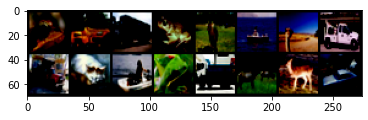

In [4]:
sample = next(iter(trainset))
def showBatch(sample):
    
    img = sample.numpy()
    plt.imshow(np.transpose(img,(1,2,0)))
samplebatch = next(iter(trainloader))
images,labels=samplebatch
showBatch(torchvision.utils.make_grid(images))

In [5]:
SigmoidNet = nn.Sequential(nn.Linear(32*32*3,50),
                          nn.Sigmoid(),
                          nn.Linear(50,8),
                          nn.Sigmoid(),
                          nn.Linear(8,10))
TanNet = nn.Sequential(nn.Linear(32*32*3,50),
                          nn.Tanh(),
                          nn.Linear(50,8),
                          nn.Tanh(),
                          nn.Linear(8,10))
ReluNet = nn.Sequential(nn.Linear(32*32*3,50),
                          nn.ReLU(),
                          nn.Linear(50,8),
                          nn.ReLU(),
                          nn.Linear(8,10))

In [6]:
!pip install pytorchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from pytorchsummary import summary
print('_'*50,'Sigmid','_'*150)
summary((3*32*32,),SigmoidNet)
print('_'*50,'TanH','_'*150)
summary((3*32*32,),TanNet)
print('_'*50,'ReLU','_'*150)
summary((3*32*32,),ReluNet)

__________________________________________________ Sigmid ______________________________________________________________________________________________________________________________________________________
               Layer	Output Shape        	    Kernal Shape    	#params             	#(weights + bias)   	requires_grad
------------------------------------------------------------------------------------------------------------------------------------------------------
            Linear-1	[1, 50]             	     [50, 3072]     	153650              	(153600 + 50)       	True True 
           Sigmoid-2	[1, 50]             	                    	                    	                    	          
            Linear-3	[1, 8]              	      [8, 50]       	408                 	(400 + 8)           	True True 
           Sigmoid-4	[1, 8]              	                    	                    	                    	          
            Linear-5	[1, 10]             	      [10, 8]  

(154148, 154148, 0)

In [8]:
def train(model,criterion,trainloader,valloader,optimizer,epochs=20):
    acc = {'trainAcc':[], 
                 'valAcc':[]}
    
    for e in range(epochs):
        print(f'Epoch {e+1}/{epochs}')
        correct=correct_=0
        model.train()

        for (x,y) in tqdm(trainloader):
            optimizer.zero_grad()
            yhat = model(x.view(-1,3*32*32))
            loss = criterion(yhat,y)
            loss.backward()
            optimizer.step()
            _,label = torch.max(yhat,1)
            correct +=(label==y).sum().item()
            
        acc['trainAcc'].append(correct/(len(trainloader)*batch_size))
        print(f'Train || Correct/total: {correct}/{len(trainloader)*batch_size}')
        model.eval()
        for x_,y_ in tqdm(valloader):
            yhat_ = model(x_.view(-1,3*32*32))
            _,label_ = torch.max(yhat_,1)
            correct_ +=(label==y_).sum().item()
        acc['valAcc'].append(correct_/(len(valloader)*batch_size))
        print(f'Validation || Correct/total: {correct_}/{len(valloader)*batch_size}')
    return acc

In [9]:
lr = 0.01
criterion = nn.CrossEntropyLoss()

In [10]:
optimizer = torch.optim.SGD(SigmoidNet.parameters(),lr=lr)
sigmoid_results = train(SigmoidNet,criterion,trainloader,testloader,optimizer)

Epoch 1/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 9107/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1002/10000
Epoch 2/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 11354/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1051/10000
Epoch 3/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 13733/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1002/10000
Epoch 4/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 15285/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 996/10000
Epoch 5/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 16236/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1005/10000
Epoch 6/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 16865/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 996/10000
Epoch 7/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 17347/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 991/10000
Epoch 8/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 17812/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 997/10000
Epoch 9/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 18181/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 991/10000
Epoch 10/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 18555/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 982/10000
Epoch 11/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 18929/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1031/10000
Epoch 12/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 19233/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 995/10000
Epoch 13/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 19568/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1005/10000
Epoch 14/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 19915/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1032/10000
Epoch 15/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 20193/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1036/10000
Epoch 16/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 20621/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 996/10000
Epoch 17/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 20915/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1004/10000
Epoch 18/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 21237/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1014/10000
Epoch 19/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 21554/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1030/10000
Epoch 20/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 21789/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 954/10000


In [11]:
optimizer = torch.optim.SGD(TanNet.parameters(),lr=lr)
tan_results = train(TanNet,criterion,trainloader,testloader,optimizer)

Epoch 1/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 16175/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1041/10000
Epoch 2/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 19407/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1001/10000
Epoch 3/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 20726/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1020/10000
Epoch 4/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 21759/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1036/10000
Epoch 5/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 22532/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 962/10000
Epoch 6/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 23017/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1018/10000
Epoch 7/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 23611/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 988/10000
Epoch 8/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 24053/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1002/10000
Epoch 9/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 24497/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 985/10000
Epoch 10/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 24989/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1003/10000
Epoch 11/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 25173/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 952/10000
Epoch 12/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 25557/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 997/10000
Epoch 13/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 25911/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 994/10000
Epoch 14/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 26142/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 945/10000
Epoch 15/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 26483/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1012/10000
Epoch 16/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 26671/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 973/10000
Epoch 17/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 26745/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 996/10000
Epoch 18/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 27151/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 990/10000
Epoch 19/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 27365/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1003/10000
Epoch 20/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 27486/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 987/10000


In [12]:
optimizer = torch.optim.SGD(ReluNet.parameters(),lr=lr)
relu_results = train(ReluNet,criterion,trainloader,testloader,optimizer)

Epoch 1/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 16493/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 973/10000
Epoch 2/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 21565/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1006/10000
Epoch 3/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 23182/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 984/10000
Epoch 4/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 24183/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 998/10000
Epoch 5/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 24926/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 972/10000
Epoch 6/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 25627/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 964/10000
Epoch 7/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 26112/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 995/10000
Epoch 8/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 26516/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1003/10000
Epoch 9/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 26907/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1034/10000
Epoch 10/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 27215/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1028/10000
Epoch 11/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 27523/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 964/10000
Epoch 12/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 27850/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 996/10000
Epoch 13/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 28090/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1021/10000
Epoch 14/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 28315/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1035/10000
Epoch 15/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 28466/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 976/10000
Epoch 16/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 28559/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 980/10000
Epoch 17/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 28922/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1024/10000
Epoch 18/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 29066/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 983/10000
Epoch 19/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 29106/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 976/10000
Epoch 20/20


  0%|          | 0/3125 [00:00<?, ?it/s]

Train || Correct/total: 29423/50000


  0%|          | 0/625 [00:00<?, ?it/s]

Validation || Correct/total: 1004/10000


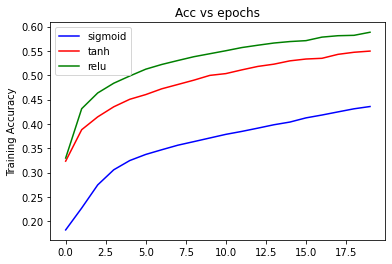

In [13]:
plt.plot(sigmoid_results['trainAcc'],label='sigmoid',color='blue')
plt.plot(tan_results['trainAcc'],label='tanh',color='red')
plt.plot(relu_results['trainAcc'],label='relu',color='green')
plt.ylabel('Training Accuracy')
plt.title('Acc vs epochs')
plt.legend()